# Digit Recognizer

In [19]:
import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import train_test_split

np.random.seed(20)

## Preprocess the data

### Load train and test data

In [20]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
print('Trainset size : ', train.shape)
print('Testset size : ', test.shape)

Trainset size :  (42000, 785)
Testset size :  (28000, 784)


## Data exploration

The train data has 785 columns with 784 columns which each value is a pixel and one column for the label. 
Whereas, the test data has only 784 columns for the pixel and no label with it.

In [21]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
print('The maximum value of one pixel : ', np.max(train.max().values))

The maximum value of one pixel :  255


The pixel value is an integer in the range `[0, 255]`.

Convert into numpy array.

In [23]:
train_arr = train.iloc[:, 1:].values
label_arr = train.iloc[:, 0].values
test_arr = test.values

Let's visualize 10 images from the data.

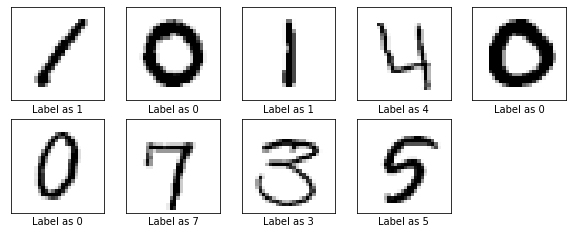

In [24]:
plt.figure(figsize=[10, 10])

for i in range(0, 9):
    # Reshape the data to 28x28 images
    img = train_arr[i].reshape([28, 28])
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img, cmap=plt.cm.binary)
    plt.xlabel(f'Label as {label_arr[i]}')
plt.show()

## Data preprocessing

### MinMax scaling

Range the values of the pixels to 0.1 to 0.9.  

In [25]:
def normalize_grayscale(image_data):
    a = 0.1
    b = 0.9
    x_max = image_data.max()
    x_min = image_data.min()
    return a + ((image_data - x_min) * (b - a)) / (x_max - x_min) 

train_arr = normalize_grayscale(train_arr)
test_arr = normalize_grayscale(test_arr)

### One hot encoding the labels
One hot encoding for optimizing the training process.

In [26]:
label_arr = tf.keras.utils.to_categorical(label_arr, 10)

## Building the network

### Setup the layers

Our model consist of a simple MLP for image classification. Since our image is 784 of pixels images, we don't need to flatten it again. 

In [78]:
mlp = tf.keras.Sequential([
    tf.keras.layers.Dense(512, input_dim=784, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
mlp.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=['accuracy'])

mlp.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 512)               401920    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_19 (Dense)            (None, 128)               65664     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_20 (Dense)            (None, 10)                1290      
                                                                 
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


### Splitting the data

We need to split the train data to trainset and testset for evaluating the performance of the model that we've built.

In [31]:
X_train, X_test, y_train, y_test = train_test_split(train_arr, label_arr, test_size=0.2, random_state=20)

(33600, 784)

Now let's create batches for prevent to overfitting on the training process.

In [72]:
BATCH_SIZE = 50
train_data = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_data = tf.data.Dataset.from_tensor_slices((X_test, y_test))
train_data = train_data.cache().repeat().shuffle(X_train.shape[0]).batch(BATCH_SIZE)
test_data = test_data.cache().batch(BATCH_SIZE)

### Training the model

Let's go ahead and train our model.


In [79]:
mlp.fit(train_data, epochs=10, steps_per_epoch=math.ceil(X_train.shape[0]/BATCH_SIZE))



Epoch 1/10
672/672 [==============================] - 7s 8ms/step - loss: 0.4011 - accuracy: 0.8777
Epoch 2/10
672/672 [==============================] - 5s 8ms/step - loss: 0.1942 - accuracy: 0.9397
Epoch 3/10
672/672 [==============================] - 5s 8ms/step - loss: 0.1450 - accuracy: 0.9565
Epoch 4/10
672/672 [==============================] - 5s 8ms/step - loss: 0.1225 - accuracy: 0.9621
Epoch 5/10
672/672 [==============================] - 5s 8ms/step - loss: 0.1009 - accuracy: 0.9678
Epoch 6/10
672/672 [==============================] - 6s 8ms/step - loss: 0.0922 - accuracy: 0.9705
Epoch 7/10
672/672 [==============================] - 5s 8ms/step - loss: 0.0860 - accuracy: 0.9719: 0s
Epoch 8/10
672/672 [==============================] - 5s 8ms/step - loss: 0.0728 - accuracy: 0.9762
Epoch 9/10
672/672 [==============================] - 5s 8ms/step - loss: 0.0653 - accuracy: 0.9793
Epoch 10/10
672/672 [==============================] - 5s 8ms/step - loss: 0.0636 - accuracy: 0.

### Evaluation

Last but not least, let's evaluate the model on the test data

In [80]:
test_loss, test_accuracy = mlp.evaluate(test_data, steps=math.ceil(X_test.shape[0]/BATCH_SIZE))

168/168 [==============================] - 1s 4ms/step - loss: 0.0940 - accuracy: 0.9733
